Write a simple example for dys with rosenbrock 

Created on 8/July-2024


# dependency

In [1]:
from plnet.solver import mln_back_solve_dys_demo, get_bilipnet_params
from plnet.layer import BiLipNet, PLNet
import jax.random as random
import orbax.checkpoint
from plnet.rosenbrock_utils import Sampler
import matplotlib.pyplot as plt
import scipy.io 
from plnet.train import data_gen, train



# Train 


Default values

In [2]:
data_dim = 20
lr_max = 1e-2
epochs = 100
n_batch = 50
depth = 2 
layer_size = [256]*8
tau=2

name = 'BiLipNet'
# 	train_dir = f'{root_dir}/{name}-{depth}-tau{tau}'
root_dir = f'/home/rover/Desktop/rl_with_plnet/RL-with-PLnet/docker_rl/rl/plnet/results_exp/{name}-rosenbrock-dim{data_dim}-batch{n_batch}'
rng = random.PRNGKey(42)
rng, rng_data = random.split(rng, 2)


In [3]:
data= data_gen(rng_data, train_batches=n_batch, data_dim=data_dim, eval_batch_size=500,eval_batches=5)
print(data)
print(data['xtrain'].shape)

{'xtrain': Array([[-0.2746477 ,  0.00709057, -1.8236871 , ..., -0.63415956,
         0.8510518 , -0.6224947 ],
       [-0.5538707 , -1.1695046 ,  1.5898747 , ...,  0.0821147 ,
        -0.5494032 ,  0.878304  ],
       [ 1.2819419 ,  1.5381441 ,  1.9933634 , ...,  0.31261015,
        -1.5682011 ,  1.6566072 ],
       ...,
       [-0.07734346, -0.4260497 , -0.94378996, ...,  1.2593269 ,
        -1.4859238 , -0.24731207],
       [-0.4282632 , -1.9730673 ,  1.3093033 , ..., -0.28659534,
         0.6739979 ,  0.24835443],
       [-1.8000112 ,  1.9735584 , -0.33407068, ...,  0.61076546,
         0.54530096, -0.2641406 ]], dtype=float32), 'ytrain': Array([2.5704055, 1.703189 , 2.6351511, ..., 1.3439738, 2.346945 ,
       2.2031357], dtype=float32), 'xtest': Array([[-1.3310275 ,  1.6586399 , -1.3315091 , ...,  1.2672744 ,
         0.56081724, -0.5257354 ],
       [-1.341682  ,  0.5059233 ,  0.26627254, ..., -0.8027506 ,
         1.3598433 ,  1.036727  ],
       [-1.1940227 , -1.0970206 , -1.49

train examples for rosenbrock with some configurations

In [4]:
# data= data_gen(rng_data, train_batches=n_batch, data_dim=data_dim)


# for tau in [tau]:
# 	train_dir = f'{root_dir}/{name}-{depth}-tau{tau}'
# 	block = BiLipNet(layer_size, depth=depth, tau=tau)
# 	model = PLNet(block)
	
# 	# train(rng, model, data, name=name, train_dir=train_dir, lr_max=lr_max, epochs=epochs)


# Solve


Restore the model

In [4]:
model = PLNet(BiLipNet([256]*8, depth=depth, tau=tau))
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

train_dir = f'{root_dir}/{name}-{depth}-tau{tau}'
# where the param comes from
params = orbax_checkpointer.restore(f'{train_dir}/ckpt/params')

# run plnet func
fn = lambda x : model.apply(params, x)

solve the x based on given z

In [5]:
max_iter = 50
alpha = 1.0
Lambda = 1.0
rng = random.PRNGKey(43)
z = Sampler(rng, 10000, 20)

In [6]:
# print(params)
# print(params['params'])
print(params['params']['BiLipBlock'])

{'mon_0': {'Fab0': array([[ 0.04578928, -0.6046619 , -0.18500784, ..., -0.40577108,
        -0.22933708, -0.15688108],
       [-0.5419934 ,  0.08058529, -0.52013683, ..., -0.3222094 ,
        -0.15854031, -0.15587264],
       [-0.20833565, -0.31173334,  0.05816381, ..., -0.5080156 ,
        -0.20644751, -0.11966302],
       ...,
       [-0.5391931 , -0.3053284 , -0.35030338, ..., -0.13504398,
        -0.25506002, -0.18747342],
       [-0.21214232, -0.13993426, -0.25597808, ..., -0.092468  ,
         0.00561708, -0.12451683],
       [-0.23992245, -0.1575929 , -0.13678885, ..., -0.00774763,
        -0.18524133, -0.10089488]], dtype=float32), 'Fab1': array([[-1.3302662e+00,  6.5897651e-02, -4.6127564e-01, ...,
         1.2751067e-01,  3.1670982e-01, -2.8153804e-01],
       [-5.0225008e-02, -7.9325318e-01, -8.6394712e-02, ...,
        -2.2829264e-01,  1.6269800e-01,  1.0404946e-02],
       [ 4.9812630e-01,  1.7687973e-01,  1.0727456e+00, ...,
         4.6899065e-01, -2.9501992e-01,  5.9558

In [1]:
from plnet.layer import Unitary
from plnet.layer_mu import MonLipNet
import jax.numpy as jnp

(uni_params, mon_params, b_params, bh_params) = get_bilipnet_params(params, 
																	depth = depth,
                                                                    orth=Unitary(),
                                                                    mln=MonLipNet(layer_size, jnp.sqrt(tau)))


NameError: name 'get_bilipnet_params' is not defined

In [8]:
from plnet.solver import mln_back_solve_dys
import jax
# inversed_dat = mln_back_solve_dys(uni_params, mon_params, b_params, bh_params, 
# 						jax.numpy.zeros(jax.numpy.shape(z)), layer_size, max_iter = max_iter, alpha=alpha, Lambda=Lambda, depth = depth, fn=fn,)
# # data = mln_back_solve_dys_demo(uni_params, mon_params, b_params, bh_params, z, fn, None,  
# #                                layer_size, max_iter=max_iter, alpha=alpha, Lambda=Lambda, depth = depth, is_partial=False)

jitted_mln_back_solve_dys = jax.jit(mln_back_solve_dys)
# data = mln_back_solve_dys_demo(uni_params, mon_params, b_params, bh_params, z, fn, None,  
#                                layer_size, max_iter=max_iter, alpha=alpha, Lambda=Lambda, depth = depth, is_partial=False)
data = jitted_mln_back_solve_dys(uni_params, mon_params, b_params, bh_params, z, depth,  
                               layer_size, max_iter=max_iter, alpha=alpha, Lambda=Lambda,fn=fn)

TypeError: Cannot interpret value of type <class 'function'> as an abstract array; it does not have a dtype attribute

save

In [10]:
plt.semilogy(data['step'], data['vgap'])
plt.savefig(f'{train_dir}/DYS-PLNet-alpha{alpha:.1f}-lambda{Lambda:.1f}.pdf')
plt.close()
scipy.io.savemat(f'{train_dir}/DYS-PLNet-alpha{alpha:.1f}-lambda{Lambda:.1f}.mat', data)

KeyError: 'step'

plot

# HNN
Test HNN model here

simple dataset

In [11]:
import optax
from flax.training.train_state import TrainState
from plnet.layer import HNN, JRModel, V_PLNet, BiLipNet
import jax.random as random


# Initialize model
depth = 2 
layer_size = [128]*4
tau=2
data_dim = 2
hidden_layers = [32, 32]
jr_model = JRModel(size=data_dim, hidden_layers=hidden_layers)
# h_net = SimpleHamiltonian()
block = BiLipNet(layer_size, depth=depth, tau=tau)
h_net = V_PLNet(block)

# def h_net(point):
#     return jax.numpy.linalg.norm(point)

hnn = HNN(jr_model, h_net, True, equillibrium_point=jax.numpy.array([0,0]))



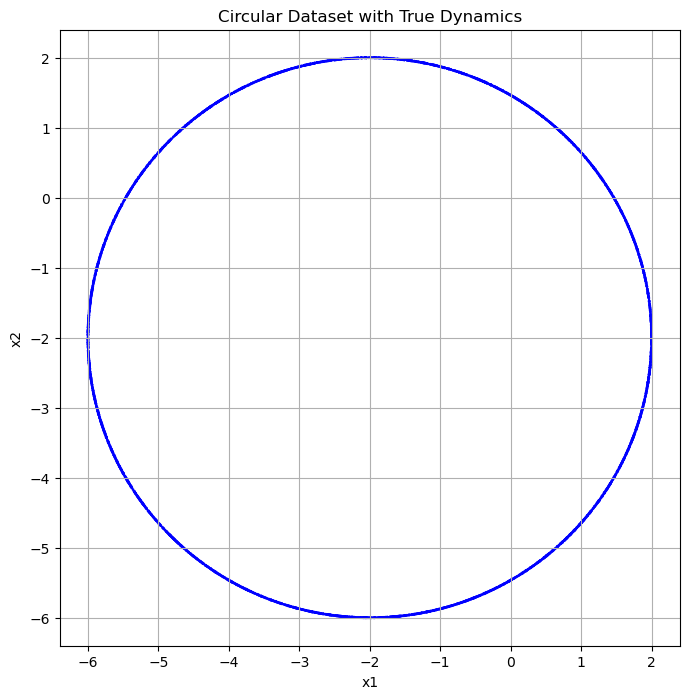

(40000, 2)
(40000, 2)


In [12]:
from plnet.train import circular_data_generator
import jax.numpy as jnp
import matplotlib.pyplot as plt

data_dim = 20
rng = random.PRNGKey(42)
rng, rng_data = random.split(rng, 2)

n_batch = 50
# Generate the dataset
data = data = circular_data_generator(rng)

# Visualize the training data with dynamics
plt.figure(figsize=(8, 8))
plt.quiver(data["xtest"][:, 0], data["xtest"][:, 1], data["ytest"][:, 0], data["ytest"][:, 1],
           color="blue")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Circular Dataset with True Dynamics")
plt.grid()

plt.show()

print(data['xtrain'].shape)
print(data['ytrain'].shape)


In [13]:
from plnet.train import train_with_flexible_loss
import optax
import jax
model = hnn
@jax.jit
def compute_loss(state, params, x, dX):
    """Compute the loss given the inputs and targets."""
    x_dot = model.apply(params, x)  # Forward pass
    loss = optax.l2_loss(x_dot, dX).mean()  # Mean squared error loss
    return loss  # Return the scalar loss

name = 'hnn'
lr_max =1e-3
root_dir = f'/home/rover/Desktop/rl_with_plnet/RL-with-PLnet/docker_rl/rl/plnet/results_exp/{name}'
train_dir = f'{root_dir}/{name}-{depth}-tau{tau}'

train_with_flexible_loss(rng, hnn, data, compute_loss, compute_loss,
                          name=name, train_dir=train_dir, lr_max=lr_max, epochs=100,  is_batched_input = True)


model: hnn, size: 0.24M
Epoch:   1 | loss: 568.6783/64.1424, tau: 0.0, Lip: 0.000/0.00
Epoch:   2 | loss: 30.1708/13.7467, tau: 0.0, Lip: 0.000/0.00
Epoch:   3 | loss: 8.4062/5.1262, tau: 0.0, Lip: 0.000/0.00
Epoch:   4 | loss: 3.7206/2.7577, tau: 0.0, Lip: 0.000/0.00
Epoch:   5 | loss: 2.2380/1.8941, tau: 0.0, Lip: 0.000/0.00
Epoch:   6 | loss: 1.6854/1.5477, tau: 0.0, Lip: 0.000/0.00
Epoch:   7 | loss: 1.4273/1.3446, tau: 0.0, Lip: 0.000/0.00
Epoch:   8 | loss: 1.2575/1.2034, tau: 0.0, Lip: 0.000/0.00
Epoch:   9 | loss: 1.1381/1.1035, tau: 0.0, Lip: 0.000/0.00
Epoch:  10 | loss: 1.0537/1.0329, tau: 0.0, Lip: 0.000/0.00
Epoch:  11 | loss: 0.9946/0.9814, tau: 0.0, Lip: 0.000/0.00
Epoch:  12 | loss: 0.9464/0.9378, tau: 0.0, Lip: 0.000/0.00
Epoch:  13 | loss: 0.9068/0.9031, tau: 0.0, Lip: 0.000/0.00
Epoch:  14 | loss: 0.8749/0.8758, tau: 0.0, Lip: 0.000/0.00
Epoch:  15 | loss: 0.8467/0.8522, tau: 0.0, Lip: 0.000/0.00
Epoch:  16 | loss: 0.8210/0.8237, tau: 0.0, Lip: 0.000/0.00
Epoch:  17 

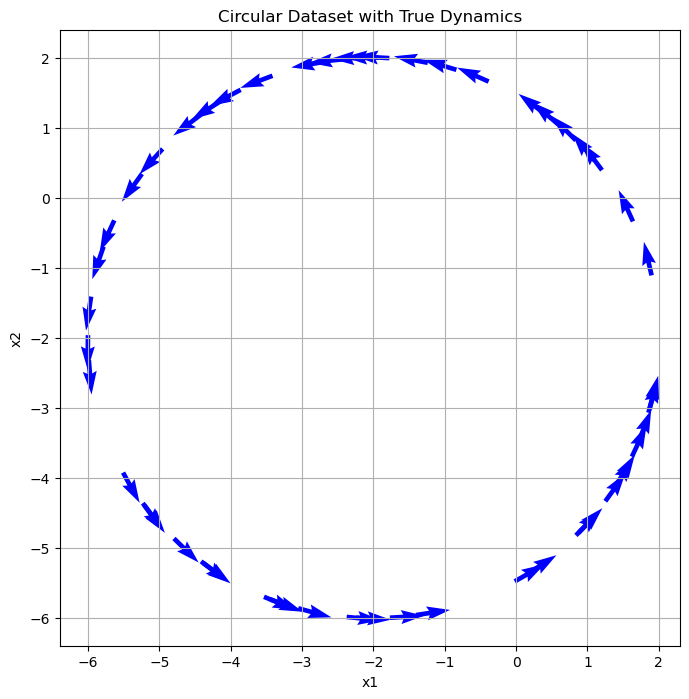

In [14]:
plt.figure(figsize=(8, 8))
plt.quiver(data["xtest"][:50, 0], data["xtest"][:50, 1], data["ytest"][:50, 0], data["ytest"][:50, 1],
           color="blue")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Circular Dataset with True Dynamics")
plt.grid()

plt.show()

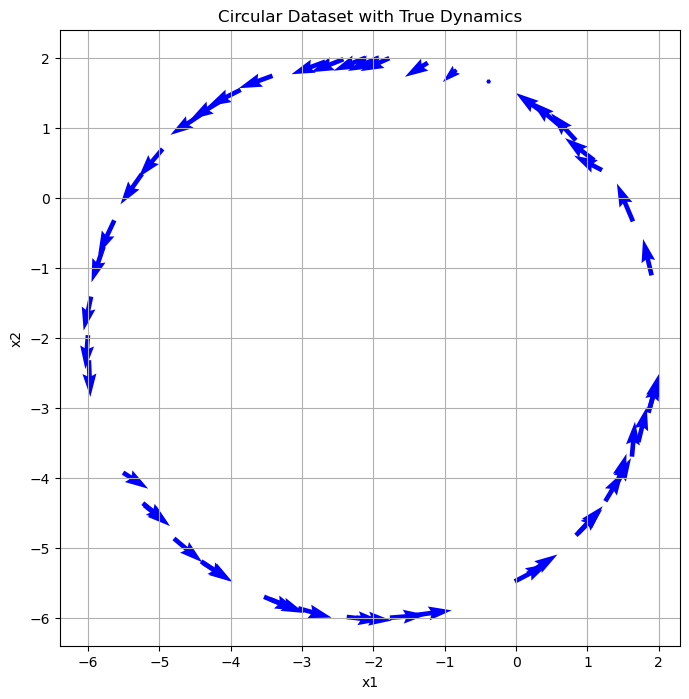

In [15]:
import orbax.checkpoint

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

# where the param comes from
params = orbax_checkpointer.restore(f'{train_dir}/ckpt/params')

# run plnet func
y = hnn.apply(params, data["xtest"][:50, :])

plt.figure(figsize=(8, 8))
plt.quiver(data["xtest"][:50, 0], data["xtest"][:50, 1], y[:, 0], y[:, 1],
           color="blue")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Circular Dataset with True Dynamics")
plt.grid()

plt.show()